<a href="https://colab.research.google.com/github/polina222232/ML_Lab/blob/main/_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Лабораторная работа по машинному обучению "Исследование данных, их визуализация и интерпретация"***

# Новый раздел

Использование библиотек

Padnas



Seaborn — это библиотека для создания статистических графиков на Python. Она построена на основе matplotlib и тесно интегрируется со структурами данных pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
empty_rows_count = df.isna().sum().sum()  # Считаем все пустые значения в файле
# Печать количества пустых строк
print(f'Количество пустых строк: {empty_rows_count}')

Количество пустых строк: 522


In [ ]:
# Найти все колонки с типами 'object' или 'text'
text_columns = df.select_dtypes(include=['object']).columns.count()

# Вывести список этих колонок
print("Колонки с типом 'object' или 'text':")
print(text_columns)

NameError: name 'df' is not defined

In [ ]:
duplicates_by_name = df[df.duplicated(subset=['name'], keep=False)]
duplicates_by_japanese_name = df[df.duplicated(subset=['japanese_name'], keep=False)]

# Объединить результаты (если они не пересекаются)
duplicates = pd.concat([duplicates_by_name, duplicates_by_japanese_name]).drop_duplicates()

# Вывести найденные дубликаты
if not duplicates.empty:
    print("Найденные покемоны с одинаковыми именами:")
    print(duplicates)
else:
    print("Покемоны с одинаковыми именами не найдены.")

Покемоны с одинаковыми именами не найдены.


Найдём количество пустых строк в каждом столбце в датафрейме

In [ ]:
# Определяем столбцы для проверки пропущенных значений
columns_to_check = [
    "abilities", "against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy",
    "against_fight", "against_fire", "against_flying", "against_ghost", "against_grass", "against_ground",
    "against_ice", "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel",
    "against_water", "attack", "base_egg_steps", "base_happiness", "base_total", "capture_rate",
    "classfication", "defense", "experience_growth", "height_m", "hp", "japanese_name", "name",
    "percentage_male", "pokedex_number", "sp_attack", "sp_defense", "speed", "type1", "type2",
    "weight_kg", "generation", "is_legendary"
]

# Подсчет пропущенных значений
missing_values = df[columns_to_check].isnull().sum()
print("Пропущенные значения по столбцам:")
print(missing_values[missing_values > 0])



Пропущенные значения по столбцам:
height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64


Сделаем вывод что пустые строки height_m, weight_kg можно удалить так как это

In [ ]:
missing_height = df["height_m"].isnull()
print("Строки с пропущенными значениями height_m и weight_kg:")
print(missing_height)

Строки с пропущенными значениями height_m и weight_kg:
0      False
1      False
2      False
3      False
4      False
       ...  
796    False
797    False
798    False
799    False
800    False
Name: height_m, Length: 801, dtype: bool


Рассмотрим легендарных покемонов:

Ананлизируем харакиеристики легендарных покемонов по определенных характеристик


1. hp: базовый HP покемона
2. Attack: базовая атака покемона
3. Defence: базовая защита покемона
4. sp_attack: базовая специальная атака покемона
5. sp_defense: базовая Специальная защита покемона



In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

df["type2"].fillna("None", inplace=True)

# Заполняем percentage_male средним значением по типу
if "type1" in df.columns:
    df["percentage_male"] = df.groupby("type1")["percentage_male"].transform(lambda x: x.fillna(x.mean()))

# Анализ характеристик "against_"
against_cols = [
    "against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", "against_fight",
    "against_fire", "against_flying", "against_ghost", "against_grass", "against_ground", "against_ice",
    "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel", "against_water"
]

# Определяем максимальные значения защиты
max_against = df[against_cols].max()

# Визуализация данных с помощью интерактивной гистограммы
fig = px.bar(
    x=max_against.index,
    y=max_against.values,
    labels={'x': 'Тип атаки', 'y': 'Максимальная защита'},
    title="Максимальные значения защиты покемонов против атак разных типов",
    text=max_against.values
)
fig.update_traces(textposition='outside', marker_color='blue')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Анализ характеристик легендарных покемонов
legendary_pokemon = df[df["is_legendary"] == 1]
stats = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]

# Интерактивная гистограмма распределения характеристик легендарных покемонов
fig_legendary = go.Figure()
for stat in stats:
    fig_legendary.add_trace(go.Histogram(
        x=legendary_pokemon[stat],
        name=stat.capitalize(),
        opacity=0.7
    ))

fig_legendary.update_layout(
    barmode='overlay',
    title="Распределение характеристик легендарных покемонов",
    xaxis_title="Значение характеристики",
    yaxis_title="Частота",
    hovermode="x unified"
)
fig_legendary.show()


<ipython-input-17-1365c07a553e>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Рассмотрим характеристики всех покемонов для характеристик:
Восемнадцать характеристик, обозначающих количество урона, полученного при атаке определенного типа.
1.	against_bug;
2.	against_dark;
3.	against_dragon;
4.	against_electric;
5.	against_fairy;
6.	against_fight;
7.	against_fire;
8.	against_flying;
9.	against_ghost;
10.	against_grass;
11.	against_ground;
12.	against_ice;
13.	against_normal;
14.	against_poison;
15.	against_psychic;
16.	against_rock;
17.	against_steel;
18.	against_water
Выделим максимальные и минимальные значения для каждого типа против.
Найти

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Загружаем данные
file_path = "/сpokemon.csv"
df = pd.read_csv(file_path)

# Определяем столбцы, обозначающие количество урона от разных типов атак
against_columns = [
    "against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", "against_fight",
    "against_fire", "against_flying", "against_ghost", "against_grass", "against_ground", "against_ice",
    "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel", "against_water"
]

# Находим максимальные и минимальные значения для каждого типа
against_stats = pd.DataFrame({
    "max_value": df[against_columns].max(),
    "min_value": df[against_columns].min()
})
print("Максимальные и минимальные значения урона от атак разных типов:")
print(against_stats)

# Определяем покемонов с максимальными значениями сопротивляемости по каждому типу
max_resistance_pokemon = {}
for col in against_columns:
    max_value = df[col].max()
    max_pokemons = df[df[col] == max_value][["name", "type1", "type2"]]
    max_resistance_pokemon[col] = {"max_value": max_value, "count": len(max_pokemons), "pokemon": max_pokemons}

# Создаем гистограммы для каждого типа атак
for col in against_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=20, kde=True, color="blue")
    plt.title(f"Распределение устойчивости к {col}")
    plt.xlabel("Значение сопротивляемости")
    plt.ylabel("Частота")
    plt.grid()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/pokemon.csv'

Анализируем покемонов по легендарности и поколениям

Количество легендарных в каждом поколения и их процентное соотнощения

In [ ]:
legendary_counts = df.groupby('generation')['is_legendary'].value_counts().unstack()
legendary_counts = legendary_counts.fillna(0)
legendary_counts['legendary_percentage'] = (legendary_counts[1] / (legendary_counts[0] + legendary_counts[1])) * 100

# Визуализация процентного соотношения
fig1 = px.bar(legendary_counts, x=legendary_counts.index, y=['legendary_percentage'],
              labels={'value': 'Percentage', 'generation': 'Generation'},
              title='Процент легендарных покемонов в каждом поколении',
              hover_data={'legendary_percentage': True})
fig1.show()


Посмотрим распределение по поколениям не легендарных покемонов



Опредилим есть ли кореляция между весом и ростом покемонов

In [ ]:
# Анализ не легендарных покемонов
non_legendary_pokemon = df[df["is_legendary"] == 0]
# Определяем количество не легендарных покемонов по поколениям
generation_counts = non_legendary_pokemon["generation"].value_counts().sort_index()
print("Распределение не легендарных покемонов по поколениям:")
print(generation_counts)

# Визуализация распределения не легендарных покемонов по поколениям
fig_gen = px.bar(
    x=generation_counts.index,
    y=generation_counts.values,
    labels={'x': 'Поколение', 'y': 'Количество покемонов'},
    title="Количество не легендарных покемонов по поколениям",
    text=generation_counts.values
)
fig_gen.update_traces(textposition='outside', marker_color='green')
fig_gen.show()



# Сортировка всех числовых данных по возрастанию
df_sorted = df.sort_values(by=["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"], ascending=True)
print("Отсортированные данные:")
print(df_sorted.head())

Распределение не легендарных покемонов по поколениям:
generation
1    146
2     94
3    125
4     94
5    143
6     66
7     63
Name: count, dtype: int64


Отсортированные данные:
                                             abilities  against_bug  \
291                                   ['Wonder Guard']          0.5   
49   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...          1.0   
128                          ['Swift Swim', 'Rattled']          1.0   
212                 ['Sturdy', 'Gluttony', 'Contrary']          1.0   
348        ['Swift Swim', 'Oblivious', 'Adaptability']          1.0   

     against_dark  against_dragon  against_electric  against_fairy  \
291           2.0             1.0               1.0            1.0   
49            1.0             1.0               0.0            1.0   
128           1.0             1.0               2.0            1.0   
212           1.0             1.0               1.0            1.0   
348           1.0             1.0               2.0            1.0   

     against_fight  against_fire  against_flying  against_ghost  ...  \
291            0.0           2.0             2.0        

In [ ]:
legendary_counts = df.groupby('generation')['is_legendary'].value_counts().unstack().fillna(0)
legendary_counts.columns = ['Non-Legendary', 'Legendary']
legendary_counts['Total'] = legendary_counts['Non-Legendary'] + legendary_counts['Legendary']
legendary_counts['Legendary Percentage'] = (legendary_counts['Legendary'] / legendary_counts['Total']) * 100
legendary_counts.reset_index(inplace=True)

# Вывод сводной таблицы
print(legendary_counts)

# Визуализация процентного соотношения
fig1 = px.bar(legendary_counts, x='generation', y=['Non-Legendary', 'Legendary'],
              labels={'value': 'Count', 'generation': 'Generation'},
              title='Количество легендарных и не легендарных покемонов в каждом поколении',
              barmode='group', hover_data={'Legendary Percentage': True})
fig1.show()


# 2) Самый встречаемый Type 1 для каждого поколения среди легендарных и не легендарных покемонов
most_common_type = df.groupby(['generation', 'is_legendary'])['type1'].agg(lambda x: x.value_counts().idxmax()).reset_index()
pivot_table = df.pivot_table(index=['type1', 'generation'], columns='is_legendary', values='name', aggfunc='count', fill_value=0)
pivot_table.columns = ['Non-Legendary', 'Legendary']
pivot_table.reset_index(inplace=True)

# Вывод сводной таблицы
print(pivot_table)
# Визуализация
fig2 = px.bar(most_common_type, x='generation', y='type1', color='is_legendary',
              labels={'type1': 'Most Common Type 1', 'generation': 'Generation'},
              title='Самый встречаемый Type 1 для каждого поколения',
              hover_data={'type1': True})
fig2.show()

# 3) Анализ влияния against_* характеристик
against_cols = [col for col in df.columns if col.startswith('against_')]
against_stats = df.groupby(['generation', 'is_legendary'])[against_cols].agg(['min', 'max']).reset_index()

# Визуализация
for col in against_cols:
    fig = px.histogram(df, x=col, color='is_legendary', nbins=5,
                       title=f'Распределение {col} по легендарности',
                       labels={col: 'Value', 'is_legendary': 'Legendary'},
                       hover_data={col: True})
    fig.show()

# 4) Определение поколения с наибольшим числом пропусков в весе и росте
missing_values = df.groupby('generation')[['weight_kg', 'height_m']].apply(lambda x: x.isnull().sum())

# Визуализация
fig3 = px.bar(missing_values, x=missing_values.index, y=['weight_kg', 'height_m'],
              labels={'value': 'Missing Values', 'generation': 'Generation'},
              title='Количество пропусков веса и роста в каждом поколении',
              hover_data={'weight_kg': True, 'height_m': True})
fig3.show()

   generation  Non-Legendary  Legendary  Total  Legendary Percentage
0           1            146          5    151              3.311258
1           2             94          6    100              6.000000
2           3            125         10    135              7.407407
3           4             94         13    107             12.149533
4           5            143         13    156              8.333333
5           6             66          6     72              8.333333
6           7             63         17     80             21.250000


     type1  generation  Non-Legendary  Legendary
0      bug           1             12          0
1      bug           2             10          0
2      bug           3             12          0
3      bug           4              8          0
4      bug           5             17          1
..     ...         ...            ...        ...
109  water           3             23          1
110  water           4             11          2
111  water           5             16          1
112  water           6              5          0
113  water           7              8          1

[114 rows x 4 columns]


Сделаем вывод, что легендарных покемонов больше всего как абсолютном выражении так и процентном выражении больше всего 7 поколение из этого следует нужно максимально подробно рассмостреть это поколение покемонов чтобы понять почему именно это поколение самое легедарное из всех.
Седьмое поколение 2 самое малочисленое из всех в общем пакемонов в этом поколение 80.

В шестом поколение поколение их всего 72 из них 66 не легендарных и 6 легендарных как видно графику и сводной таблице.

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1      

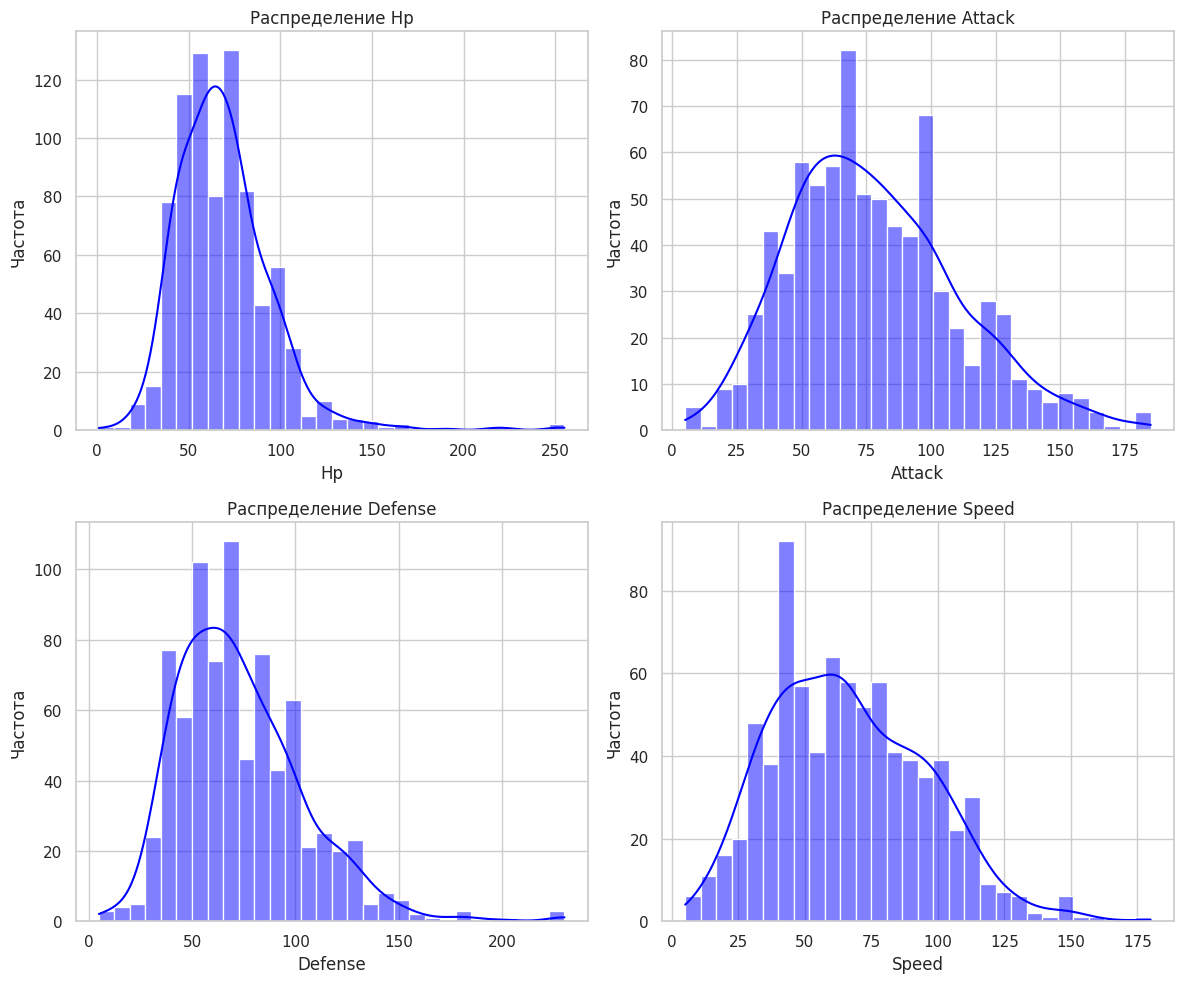

Количество пустых строк: 522


In [ ]:
# Загружаем данные
file_path = "/content/pokemon.csv"
df = pd.read_csv(file_path)

# Выводим первые строки таблицы
print(df.head())

# Выводим информацию о данных
print(df.info())

# Настройки стиля
sns.set(style="whitegrid")

# Выбираем характеристики для анализа
stats = ["hp", "attack", "defense", "speed"]

# Создаем графики распределения
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, stat in enumerate(stats):
    sns.histplot(df[stat], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f"Распределение {stat.capitalize()}")
    axes[i].set_xlabel(stat.capitalize())
    axes[i].set_ylabel("Частота")

plt.tight_layout()
plt.show()
empty_rows_count = df.isna().sum().sum()  # Считаем все пустые значения в файле

# Печать количества пустых строк
print(f'Количество пустых строк: {empty_rows_count}')